In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
imbook = cv2.imread('book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)
# print(imbook.shape)

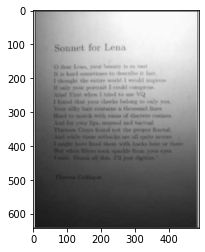

In [ ]:
plt.imshow(imbook,cmap = "gray")

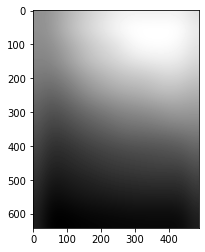

In [ ]:
from scipy import ndimage as flt
fltbook = flt.gaussian_filter(imbook, sigma = 30)
plt.imshow(fltbook,cmap = "gray")

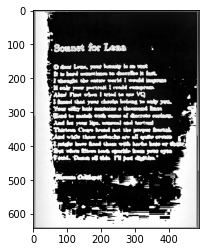

In [ ]:
plt.imshow(imbook-fltbook, cmap='gray')

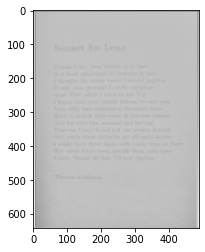

In [ ]:
import numpy as np
res = np.log10(imbook) - np.log10(fltbook)
# print(np.array(res))
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
# print(minres,maxres)
plt.imshow(res, cmap='gray')

# **TASK**
Реализовать функцию flt.gaussian_filter только с использование numpy 


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cv2
import argparse
import math 

In [ ]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [ ]:
def gaussian_kernel(size, sigma):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
 
    plt.imshow(kernel_2D, interpolation='none',cmap='gray')
    plt.title("Filter")
    plt.show()
 
    return kernel_2D

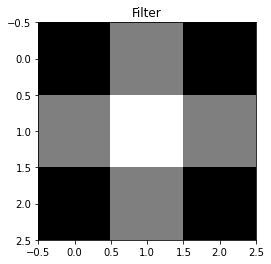

In [ ]:
kernel = gaussian_kernel(3, 30)

In [ ]:
def convolution(image, kernel):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    plt.imshow(padded_image, cmap='gray')
    plt.title("Padded Image")
    plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])

    plt.imshow(output, cmap='gray')
    plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
    plt.show()
 
    return output

In [ ]:
 def gaussian(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=30)
    return convolution(image, kernel)

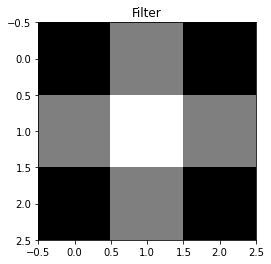

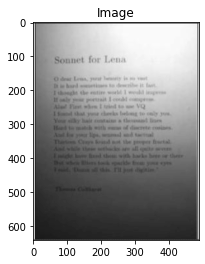

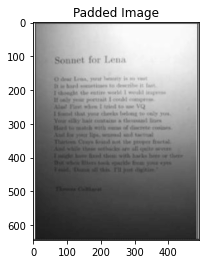

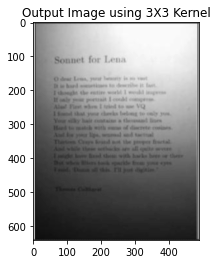

array([[1019.43356937, 1529.00876607, 1529.00876607, ..., 1529.00876607,
        1529.00876607, 1019.43356937],
       [1529.00876607, 2293.30078677, 2161.44737199, ..., 1859.70225274,
        1920.6345126 , 1301.21588601],
       [1529.00876607, 2293.30078677, 2041.50735903, ..., 1130.13207502,
        1312.97603749,  945.41358325],
       ...,
       [1463.06374061, 2203.38241318, 2054.51956706, ...,  674.46691936,
        1162.14428397,  978.41246968],
       [1193.25199018, 1835.66616893, 1722.77722512, ...,  693.417505  ,
         987.19538243,  776.500772  ],
       [ 683.56352309, 1071.21980096, 1018.31474959, ...,  487.74509889,
         607.63626369,  450.80118301]])

In [ ]:
gaussian(imbook, 3)